<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/wu_deep_lession4_week2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/wuenda_deep/Lesson4/week2/KerasTutorial')

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [12]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well.
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3,3))(X_input) 
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2,2),name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1,activation='sigmoid',name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input,outputs=X,name='HappyModel')

    return model
    
    
    
    ### END CODE HERE ###

In [0]:
### START CODE HERE ### (1 line)
happyModel = HappyModel(X_train.shape[1:])
### END CODE HERE ###

In [0]:
### START CODE HERE ### (1 line)
happyModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
### END CODE HERE ###

In [21]:
happyModel.fit(x=X_train,y=Y_train,epochs=10,batch_size=12)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.9481 - acc: 0.7517
Epoch 2/10
600/600 [==============================] - 0s 496us/step - loss: 0.2664 - acc: 0.9033
Epoch 3/10
600/600 [==============================] - 0s 487us/step - loss: 0.1314 - acc: 0.9433
Epoch 4/10
600/600 [==============================] - 0s 474us/step - loss: 0.1158 - acc: 0.9500
Epoch 5/10
600/600 [==============================] - 0s 466us/step - loss: 0.2361 - acc: 0.9233
Epoch 6/10
600/600 [==============================] - 0s 451us/step - loss: 0.1579 - acc: 0.9450
Epoch 7/10
600/600 [==============================] - 0s 440us/step - loss: 0.1084 - acc: 0.9667
Epoch 8/10
600/600 [==============================] - 0s 452us/step - loss: 0.0862 - acc: 0.9733
Epoch 9/10
600/600 [==============================] - 0s 456us/step - loss: 0.1225 - acc: 0.9650
Epoch 10/10
600/600 [==============================] - 0s 444us/step - loss: 0.1520 - acc: 0.9517


In [22]:
preds = happyModel.evaluate(x=X_test,y=Y_test)

150/150 [==============================] - 0s 700us/step


In [23]:
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = 0.7471344296137492
Test Accuracy = 0.8533333349227905


[[0.]]


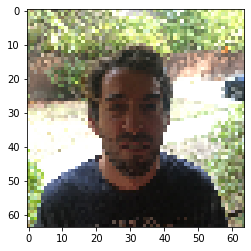

In [24]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

In [25]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0

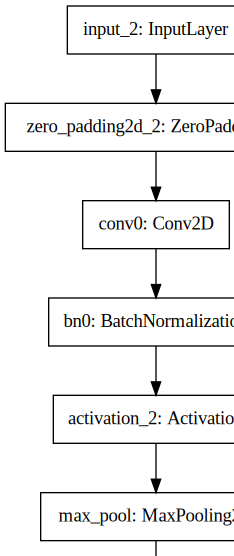

In [26]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

In [0]:
?Conv2D